In [1]:
!pip install kaggle


In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import zipfile
import numpy as np
from sklearn import svm


from sklearn.model_selection import train_test_split


In [10]:
os.environ["KAGGLE_CONFIG_DIR"]="/content/"

In [11]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:28<00:00, 28.2MB/s]
100% 812M/812M [00:28<00:00, 29.9MB/s]


In [12]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/dogs-vs-cats.zip'

# Specify the directory where you want to extract the contents
extract_path = '/content'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_path)
    print("Zip file extracted successfully.")
except zipfile.BadZipFile:
    print("Error: The file is not a valid zip file.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Zip file extracted successfully.


In [13]:
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as train:
    train.extractall('/content/')
with zipfile.ZipFile('/content/train.zip', 'r') as train:
    train.extractall('content/')


In [14]:
import os
import shutil

# Define the source folder containing mixed images
source_folder = "/content/content/train"

# Create target subfolders for each class
class_labels = set()
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg"):
        class_label = filename.split(".")[0]
        class_labels.add(class_label)

# Create subfolders for each class
for class_label in class_labels:
    class_folder = os.path.join(source_folder, class_label)
    os.makedirs(class_folder, exist_ok=True)

# Move files to their respective subfolders
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg"):
        class_label = filename.split(".")[0]
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(source_folder, class_label, filename)
        shutil.move(source_path, target_path)

print("Files organized into subfolders based on labels.")


Files organized into subfolders based on labels.


In [15]:
def load_and_preprocess_data(data_folder):
    X = []  # Feature vectors
    y = []  # Labels

    for image_file in os.listdir(data_folder):
        if image_file.endswith(".jpg"):
            # Extract the class label from the filename (e.g., "cat.0.jpg" -> "cat")
            class_label = image_file.split(".")[0]
            print("Processing:", image_file, "Class Label:", class_label)
            image_path = os.path.join(data_folder, image_file)
            # Load and preprocess the image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (64, 64))
            image = image.flatten()
            X.append(image)
            y.append(class_label)

    X = np.array(X)
    y = np.array(y)

    return X, y


In [16]:
with zipfile.ZipFile('/content/test1.zip', 'r') as test:
    test.extractall('content/')


In [17]:
import os
import cv2
import numpy as np

def load_and_preprocess_data(data_folder):
    X = []  # Feature vectors
    y = []  # Labels

    for category in os.listdir(data_folder):
        category_folder = os.path.join(data_folder, category)
        label = 0 if category == "cat" else 1  # Assign labels (0 for cat, 1 for dog)

        for image_file in os.listdir(category_folder):
            if image_file.endswith(".jpg"):
                image_path = os.path.join(category_folder, image_file)

                # Load and preprocess the image
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                image = cv2.resize(image, (64, 64))  # Resize to a common size
                image = image.flatten()  # Flatten the image into a 1D vector

                X.append(image)
                y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X, y

# Define the path to the "train" folder
train_data_folder = "/content/content/train"

# Load and preprocess the training data
X_train, y_train = load_and_preprocess_data(train_data_folder)
y_train


array([0, 0, 0, ..., 1, 1, 1])

In [18]:

def load_and_preprocess_test_data(test_folder):
    X_test = []  # Feature vectors
    for image_file in os.listdir(test_folder):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(test_folder, image_file)

            # Load and preprocess the image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = cv2.resize(image, (64, 64))  # Resize to a common size
            image = image.flatten()  # Flatten the image into a 1D vector

            X_test.append(image)

    X_test = np.array(X_test)

    return X_test

# Define the path to the "test1" folder
test_data_folder = "content/test1"

# Load and preprocess the test data
X_test = load_and_preprocess_test_data(test_data_folder)
X_test

array([[ 73,  71,  79, ..., 119, 120, 120],
       [147, 147, 149, ...,  42,  84, 104],
       [158, 168, 183, ..., 133, 158, 210],
       ...,
       [ 69,  73,  31, ..., 103, 100,  82],
       [ 22,  37,  75, ..., 199, 201, 214],
       [ 25,  25,  26, ..., 208, 201, 223]], dtype=uint8)

In [19]:
# Feature scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:

# Create an SVM classifier
from sklearn import svm  # Import the SVM module

clf = svm.SVC()
np.unique(y_train)


array([0, 1])

In [21]:
from sklearn.svm import SVC
clf = SVC()

In [22]:
# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Generate random indices for selecting 1000 samples from X_train and y_train
random_indices = np.random.choice(len(X_train), size=4000, replace=False)

# Use the random indices to create a subset of the data
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]
y_train_subset


array([0, 1, 0, ..., 1, 1, 0])

In [23]:
# Create a StandardScaler and fit/transform the subset of training data
scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1)

# Train the SVM model on the randomly selected subset of training data
clf.fit(X_train_subset, y_train_subset)

# Now, the SVM model is trained on a random subset of 4000 images and labels

SVC(C=1, kernel='linear')

In [24]:
# Make predictions on the test data
y_pred_subset = clf.predict(X_train_subset)


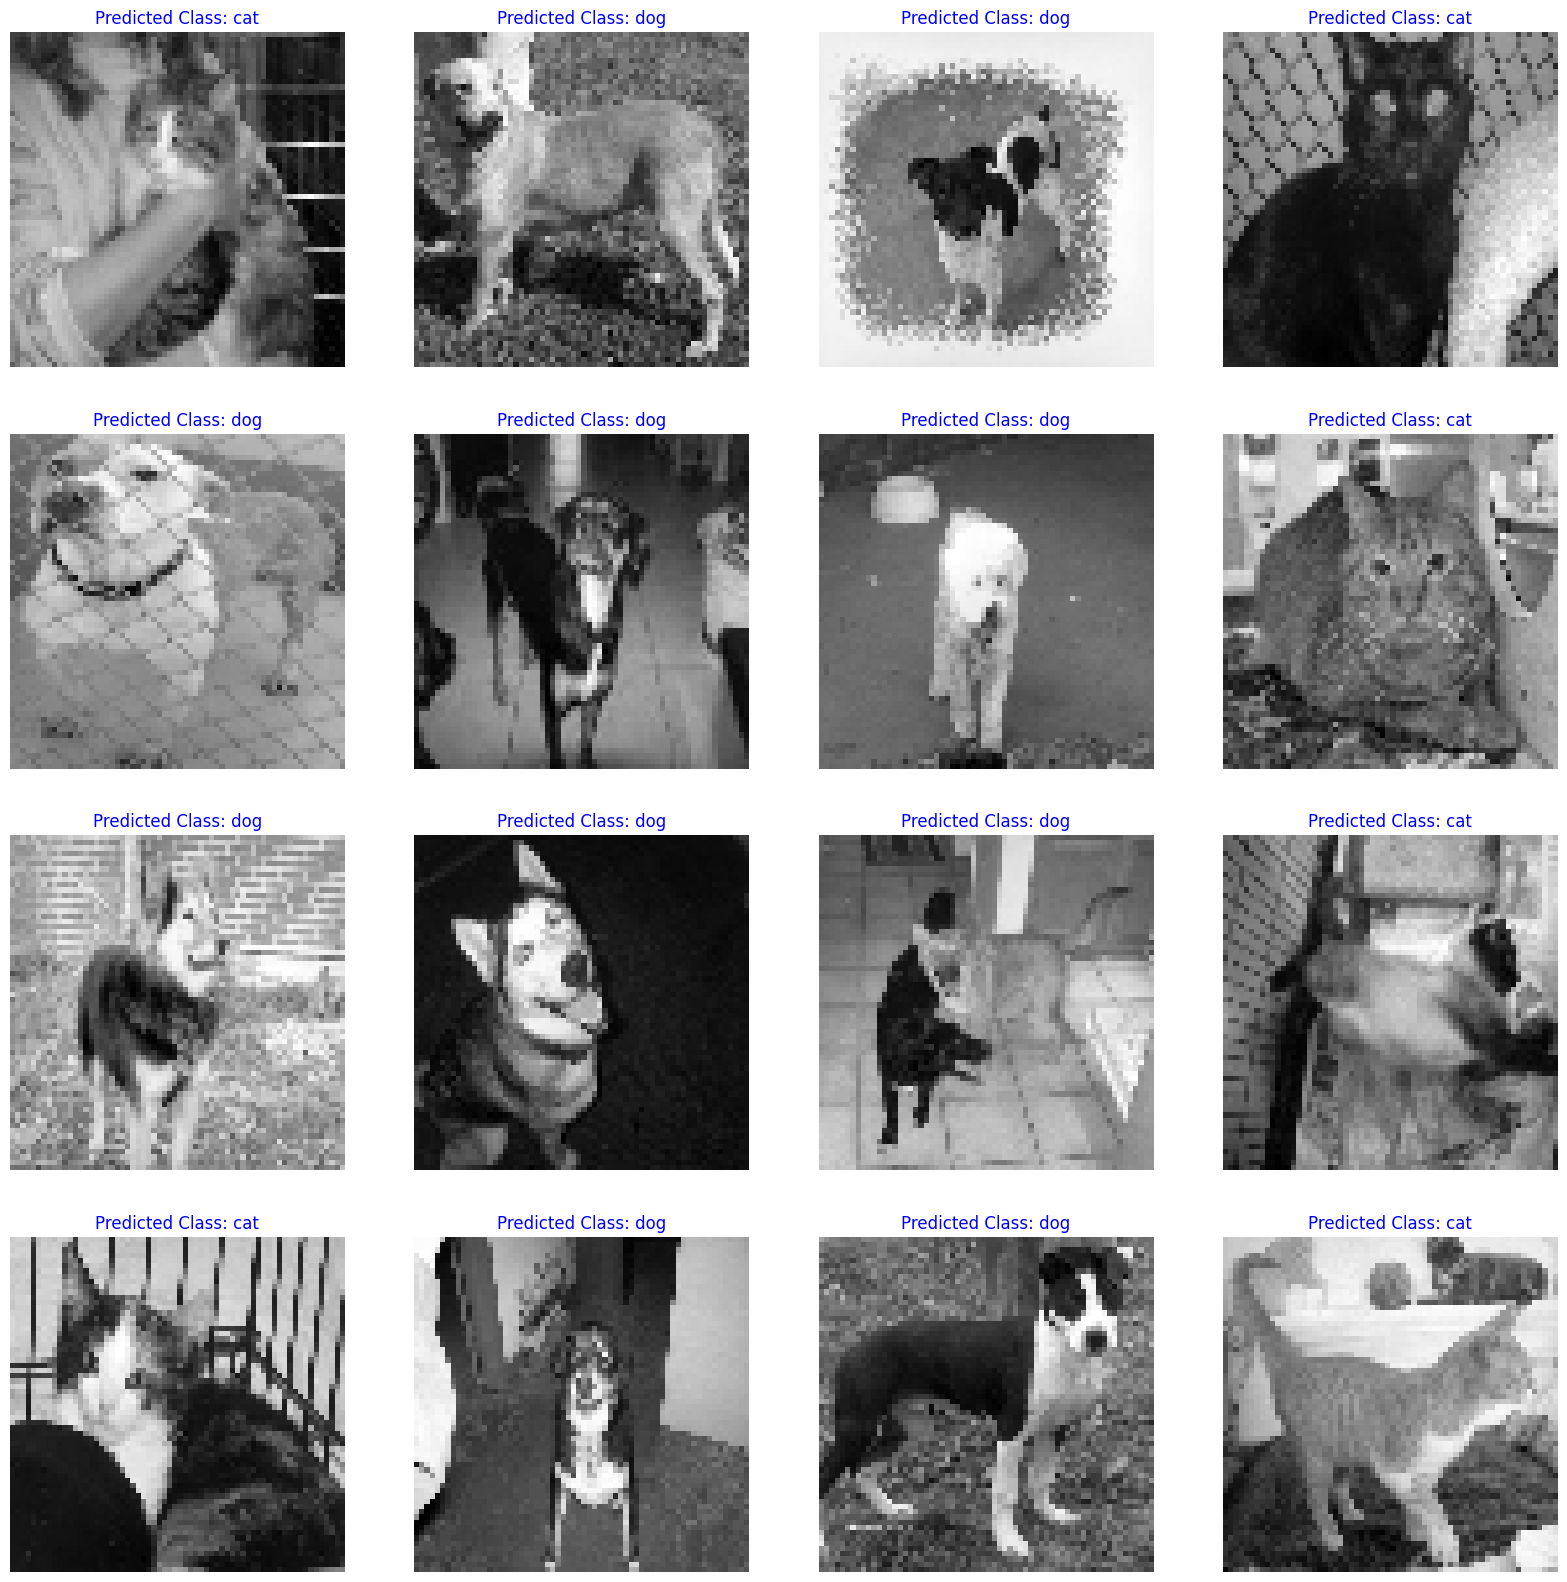

In [25]:
import matplotlib.pyplot as plt
import random

num_samples = len(X_train_subset)
random_indices = random.sample(range(num_samples), min(16, num_samples))

plt.figure(figsize=(20, 20))

for i, idx in enumerate(random_indices):
    plt.subplot(4, 4, i + 1)
    image = X_train_subset[idx].reshape(64, 64)  # Assuming image dimensions are 64x64
    image = image / 255.0  # Normalize to [0, 1]
    plt.imshow(image, cmap='gray')

    # Get the predicted label (class index)
    predicted_label = y_pred_subset[idx]
    if predicted_label == 0:
      name = 'cat'
    else :
      name = 'dog'

    plt.title(f'Predicted Class: {name}', color='blue', fontsize=12)
    plt.axis('off')

plt.show()


In [ ]:
clf.fit(X_train, y_train) #This may take too much time due to large size of data


In [ ]:
y_pred = clf.predict(X_train)